# Bike Store Sales, 23 

בר אלמקיס,
גל דוידי,
דניאל גולדשמיד,
אורי ינון ביטון

<div>
<img src= "https://raw.githubusercontent.com/gdavidi/my-project/main/Biker1.jpg" width="550"/>
</div>

In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [122]:
url = 'https://raw.githubusercontent.com/gdavidi/my-project/main/Sales.csv'
df = pd.read_csv(url)
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [123]:
df['Age_Group'].unique()

array(['Youth (<25)', 'Adults (35-64)', 'Young Adults (25-34)',
       'Seniors (64+)'], dtype=object)

In [124]:
df['Product_Category'].unique()

array(['Accessories', 'Clothing', 'Bikes'], dtype=object)

In [125]:
df['Sub_Category'].unique()

array(['Bike Racks', 'Bike Stands', 'Bottles and Cages', 'Caps',
       'Cleaners', 'Fenders', 'Gloves', 'Helmets', 'Hydration Packs',
       'Jerseys', 'Mountain Bikes', 'Road Bikes', 'Shorts', 'Socks',
       'Tires and Tubes', 'Touring Bikes', 'Vests'], dtype=object)

In [126]:
df.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [127]:
df.dtypes

Date                object
Day                  int64
Month               object
Year                 int64
Customer_Age         int64
Age_Group           object
Customer_Gender     object
Country             object
State               object
Product_Category    object
Sub_Category        object
Product             object
Order_Quantity       int64
Unit_Cost            int64
Unit_Price           int64
Profit               int64
Cost                 int64
Revenue              int64
dtype: object

**מטעמי נוחות שינינו את שמות העמודות**

In [128]:
df.rename(columns = {'Customer_Age':'Age'}, inplace = True)
df.rename(columns = {'Customer_Gender':'Gender'}, inplace = True)
df.head()

,Date,Day,Month,Year,Age,Age_Group,Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


****************************************

# בדיקה כללית של הדאטה

**טווח גילאי הלקוחות**

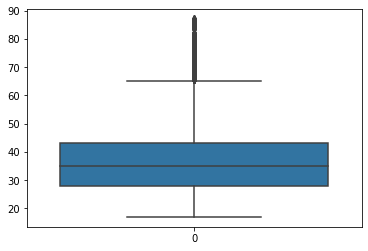

In [129]:
sns.boxplot(data = df['Age']) 
plt.show()

**ניתן לראות כי טווח גילאי הלקוחות השכיח ביותר נע בין 27 ל45**

In [130]:
len(df.loc[df.Age_Group == 'Seniors (64+)']) #מספר האנשים שמעל גיל 64

730

**המדינה הרווחית ביותר**

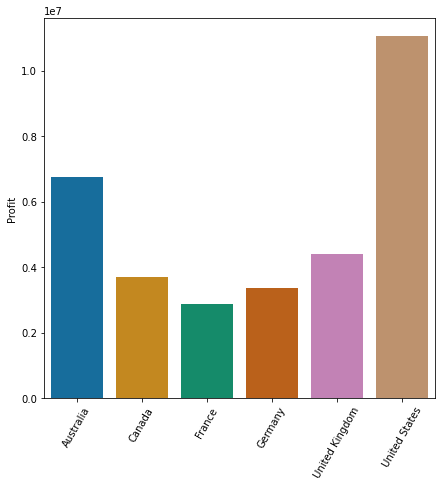

In [131]:
plt.figure(figsize = (7,7))
bar = df.groupby('Country')['Profit'].sum().copy().reset_index()
sns.barplot(data = bar, x = 'Country', y = 'Profit', palette = 'colorblind')
plt.xticks(rotation = 60)
plt.xlabel("")
plt.show()

**בדיקת הקטגורייה הרווחית ביותר, הנמכרת ביותר והיקרה ביותר**

In [132]:
df_prof_quan = df.groupby('Product_Category')[['Order_Quantity' ,'Unit_Cost', 'Unit_Price']].sum().copy().reset_index()
df_prof_quan['Profit_Percent'] = 1 - df_prof_quan['Unit_Cost'] / df_prof_quan['Unit_Price']
df_unit_cost_mean = df.groupby('Product_Category')['Unit_Cost'].mean().copy().reset_index()

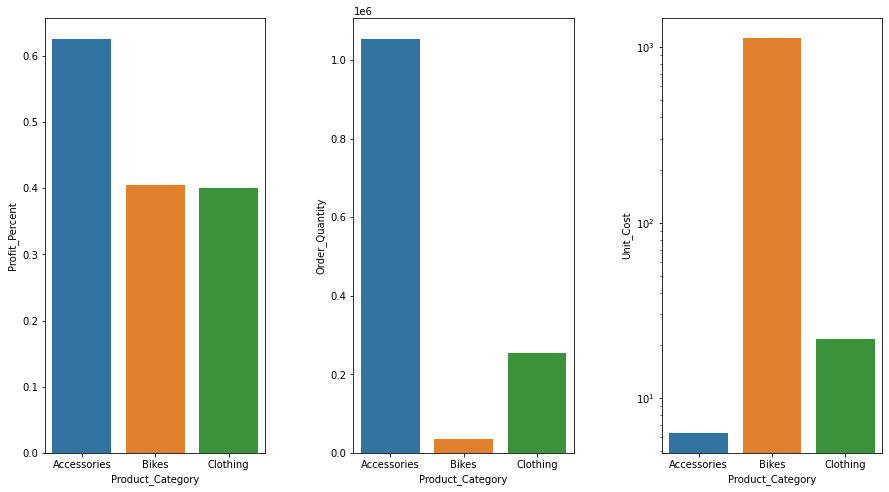

In [133]:
fig, axes = plt.subplots(figsize = (15,8), ncols = 3)
sns.barplot(data = df_prof_quan, x = 'Product_Category', y = 'Profit_Percent', ax = axes[0])
sns.barplot(data = df_prof_quan, x = 'Product_Category', y = 'Order_Quantity', ax = axes[1])
scale_change = sns.barplot(data = df_unit_cost_mean, x = 'Product_Category', y = 'Unit_Cost', ax = axes[2])
plt.subplots_adjust(wspace = 0.4)
scale_change.set_yscale('log')

*************************************

**רצינו לבדוק מה הפער בין גברים לנשים בקניית אופניים**

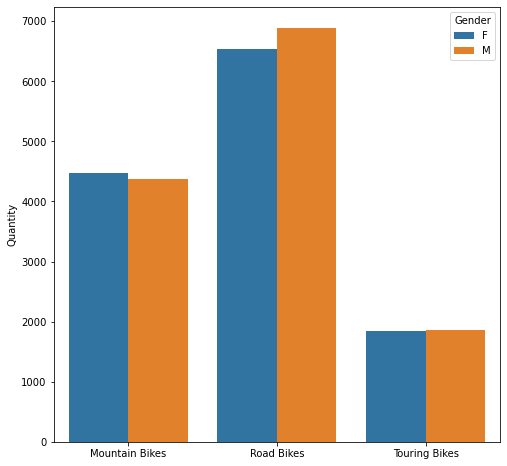

In [134]:
Bikes = df.loc[df.Product_Category == 'Bikes'].copy()
plt.figure(figsize = (8,8))
d = sns.countplot(data = Bikes, x = 'Sub_Category', hue = 'Gender', hue_order = ['F','M'])
d.set(xlabel="", ylabel="Quantity")
plt.show()

**קיבוץ לפי מגדר מכירת אופני הרים**

In [135]:
mountain_bikes = Bikes.loc[Bikes.Sub_Category == 'Mountain Bikes']
mbikes_sold_per_gender = pd.DataFrame(mountain_bikes.groupby("Gender")["Order_Quantity"].sum()).reset_index()

**השוואת כמות רכישות של אופני הרים/שטח בין גברים ונשים והשוואה כוללת של כמות הנשים והגברים שרכשו בחנות**

In [136]:
male_count = len(df.loc[df.Gender == 'M'])
female_count = len(df.loc[df.Gender == 'F'])
helpdf=pd.DataFrame({'count_gender':[female_count,male_count]})
mbikes_sold_per_gender['Gender_Count']=helpdf
mbikes_sold_per_gender.rename(columns = {'Order_Quantity':'Mountain Bikes Purchased'}, inplace = True)
mbikes_sold_per_gender

,Gender,Mountain Bikes Purchased,Gender_Count
0,F,6060,54724
1,M,5932,58312


**הצגת התובנה בגרפים**

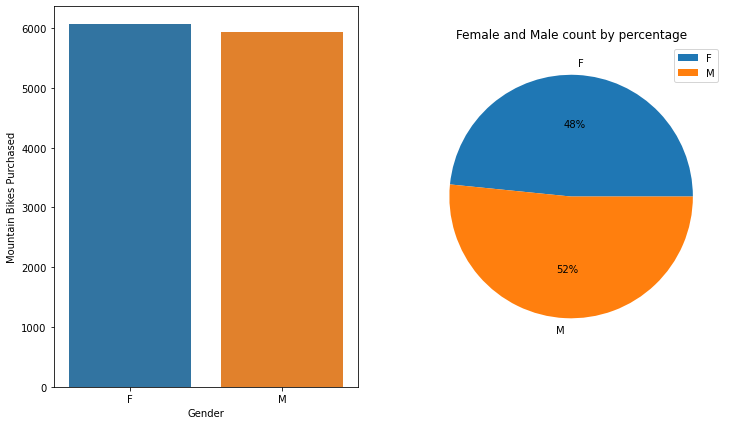

In [137]:
fig, axes = plt.subplots(figsize=(12, 7), ncols=2)
sns.barplot(data = mbikes_sold_per_gender, x='Gender', y = "Mountain Bikes Purchased", ax = axes[0])
mbikes_sold_per_gender[['Gender_Count']].plot.pie(y = 'Gender_Count', autopct='%.0f%%', labels = ['F', 'M'], ax = axes[1])
plt.title('Female and Male count by percentage')
plt.ylabel('')
plt.show()

#### תובנה 1: ניתן לראות שכמות הנשים שרכשו אופני הרים בחנות גדולה מכמות אופני ההרים שרכשו הגברים, אף על פי שכמות הגברים שביצעו רכישה בחנות עולה על כמות הנשים 

***************************************

**רצינו לבדוק כמה מכירות אופניים בוצעו בכל חודש** 

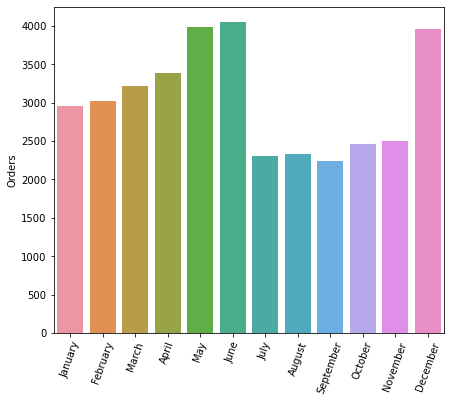

In [138]:
plt.figure(figsize = (7,6))
m_Order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_m = Bikes.groupby('Month')[['Order_Quantity']].sum().copy().reset_index()
sns.barplot(data = df_m, x = 'Month', y = 'Order_Quantity', order = m_Order)
plt.xticks(rotation = 70)
plt.xlabel('')
plt.ylabel('Orders')
plt.show()

**ראינו מהגרף שבחודשי החורף המכירות גבוהות יחסית, תהינו האם כמות המכירות בחורף גבוהות מכמות המכירות בקיץ**

**ראשית בדקנו את חודשי הקיץ והחורף בכל אחת מהמדינות, וראינו שלמעט אוסטרליה ( שהיא מדינה לא מייצגת מכיוון שיורד שם גשם כל השנה )
חודשי הקיץ הם: יוני - אוגוסט
וחודשי החורף הם : דצמבר - פברואר**

In [139]:
Bikes_No_Aus = Bikes.loc[Bikes.Country != 'Australia'] # הורדת אוסטרליה
Summer = Bikes_No_Aus.loc[(Bikes_No_Aus.Month == 'August') | (Bikes_No_Aus.Month == 'July') | (Bikes_No_Aus.Month == 'June')].copy()
Winter = Bikes_No_Aus.loc[(Bikes_No_Aus.Month == 'December') | (Bikes_No_Aus.Month == 'January') | (Bikes_No_Aus.Month == 'February')].copy()
Summer['Season'] = 'Summer'
Winter['Season'] = 'Winter'
result = pd.concat([Summer, Winter]).reset_index().drop('index', axis = 1)

**ביצענו טבלת השוואה בין כמות רכישות האופניים בחודשי הקיץ והחורף**

In [140]:
filtered_result = result.groupby('Season')[['Order_Quantity']].sum().reset_index()
filtered_result.rename(columns = {'Order_Quantity':'Bikes Purchased'}, inplace = True)
filtered_result

,Season,Bikes Purchased
0,Summer,6473
1,Winter,7162


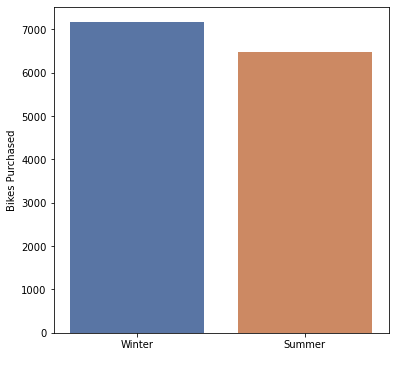

In [141]:
plt.figure(figsize = (6,6))
sns.barplot(data = filtered_result, x = 'Season', y = 'Bikes Purchased', palette = 'deep', order = ['Winter', 'Summer'])
plt.ylabel('Bikes Purchased')
plt.xlabel(' ')
plt.show()

**תובנה 2: הופתענו לגלות שכמות רכישות האופניים בחורף עולה על כמות הרכישות בקיץ, בניגוד לדעה הרווחת**

******************

**רצינו לבדוק האם קיימת מגמת עליה ברכישת אופניים בין שנה לשנה**

In [142]:
Bikes_Orders_With_Aus = Bikes.groupby('Year')[['Order_Quantity']].sum().reset_index()
Bikes_Orders_With_Aus

,Year,Order_Quantity
0,2011,5260
1,2012,5354
2,2013,5710
3,2014,4604
4,2015,8556
5,2016,6927


,Year,Order_Quantity
Year,1.000000,0.625085
Order_Quantity,0.625085,1.000000


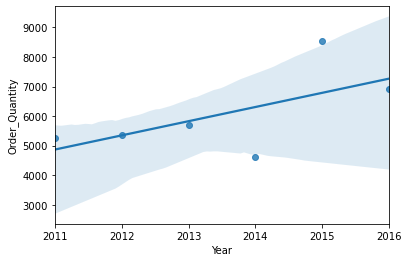

In [143]:
sns.regplot(data = Bikes_Orders_With_Aus, x = 'Year', y = 'Order_Quantity')
Bikes_Orders_With_Aus.corr()

<div>
<img src="https://raw.githubusercontent.com/gdavidi/my-project/main/2014.png" width="700"/>
</div>

**על מנת לחזק את הטענה כי קיים קשר בין השנים לכמות רכישות האופניים, נוריד את אוסטרליה מהמשוואה, כיוון והיא מדינה עם מערכת אקלים קיצונית וחריגה בהשוואה לשאר המדינות המופיעות בקובץ נצפה שהיחס יתחזק**

In [144]:
Bikes_Orders_No_Aus = Bikes_No_Aus.groupby('Year')[['Order_Quantity']].sum().reset_index()
Bikes_Orders_No_Aus

,Year,Order_Quantity
0,2011,3553
1,2012,3636
2,2013,4023
3,2014,3618
4,2015,5995
5,2016,5430


,Year,Order_Quantity
Year,1.000000,0.806963
Order_Quantity,0.806963,1.000000


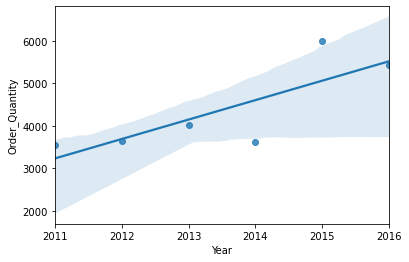

In [145]:
sns.regplot(data = Bikes_Orders_No_Aus, x = 'Year', y = 'Order_Quantity')
Bikes_Orders_No_Aus.corr()

**תובנה 3: ניתן לראות כי הקורולציה אכן התחזקה וכי קיים קשר חזק בין השנים לכמות רכישות האופניים**

***************************************

**:תובנות עיקריות**
- נשים רוכשות יותר אופני הרים מגברים
- רוכשים יותר אופניים בחודשי החורף מאשר בחודשי הקיץ
- יש קשר חזק בין השנה לכמות מכירות האופניים

**:בעקבות ניתוח הקובץ הגענו לכמה מסקנות שיכולות לעניין את גורמי ההנהלה בחברה**
- קהל היעד העיקרי נע בין טווח גילאי 25-45. לפיכך נמליץ לפרסם ברפורמות הפונות לטווח גילאים זה (פייסבוק/טוויטר)
- בארצות הברית הרווח הוא הגבוה ביותר. לפיכך נמליץ לפתוח סניפים נוספים שם
- הקטגורייה הרווחית והנמכרת ביותר היא אביזרים נלווים, יתר על כך הם גם הזולים והדחופים ביותר. לפיכך נמליץ להחזיק במלאי בכמות גבוהה